In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os 
from IPython.display import Image

In [8]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-2.10.0-cp39-cp39-win_amd64.whl (455.9 MB)
  Using cached tensorflow_gpu-2.10.0-cp39-cp39-win_amd64.whl (455.9 MB)
  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\sawan\\anaconda3\\Lib\\site-packages\\tensorflow\\_api\\v2\\compat\\v2\\__internal__\\eager_context\\__init__.py'
Consider using the `--user` option or check the permissions.



In [12]:
import tensorflow as tf
import os

In [13]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

## Data Preprocessing 

In [14]:
import cv2
import imghdr

In [15]:
data_dir = 'Images' 

In [16]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [17]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [18]:
import numpy as np
from matplotlib import pyplot as plt

In [20]:
data = tf.keras.utils.image_dataset_from_directory('Images')

Found 655 files belonging to 3 classes.


In [85]:
data_iterator = data.as_numpy_iterator()


In [91]:
batch = data_iterator.next()


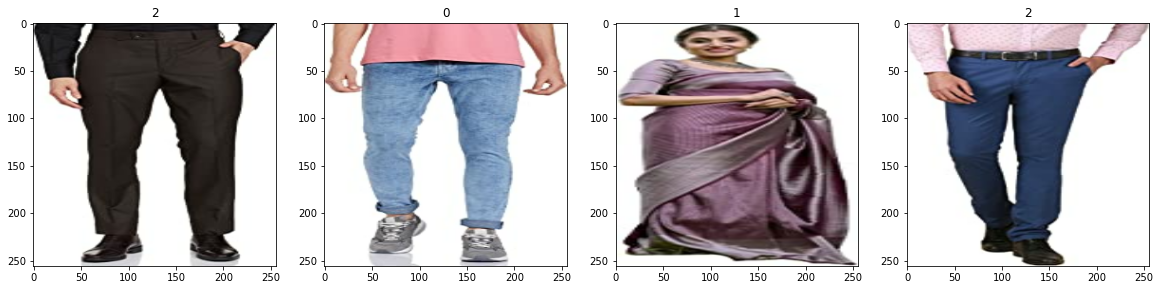

In [92]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [93]:
# Trouser = 2
# Saree = 1
# Jean = 0

In [22]:
data = data.map(lambda x,y: (x/255, y))

In [40]:
train_size = int(len(data)*.7)-1
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [41]:
len(data)

21

In [45]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

- Divided data into three parts training, validation and test data

## Model Buidling 

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [47]:
model = Sequential()


In [48]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='relu'))

In [49]:
model.compile(loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [50]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [51]:
hist = model.fit(train, epochs=20, validation_data=val)


Epoch 1/20
13/13 [==============================] - 35s 2s/step - loss: 2.6832 - accuracy: 0.3438 - val_loss: -1.1437 - val_accuracy: 0.3500
Epoch 2/20
13/13 [==============================] - 29s 2s/step - loss: 0.3666 - accuracy: 0.3510 - val_loss: -0.9531 - val_accuracy: 0.3000
Epoch 3/20
13/13 [==============================] - 29s 2s/step - loss: -0.3666 - accuracy: 0.3606 - val_loss: 0.9531 - val_accuracy: 0.3625
Epoch 4/20
13/13 [==============================] - 28s 2s/step - loss: -0.4765 - accuracy: 0.3630 - val_loss: -1.4296 - val_accuracy: 0.3187
Epoch 5/20
13/13 [==============================] - 29s 2s/step - loss: -0.8065 - accuracy: 0.3750 - val_loss: -1.5249 - val_accuracy: 0.3375
Epoch 6/20
13/13 [==============================] - 29s 2s/step - loss: -0.8431 - accuracy: 0.3582 - val_loss: -1.8108 - val_accuracy: 0.3688
Epoch 7/20
13/13 [==============================] - 28s 2s/step - loss: -0.8065 - accuracy: 0.3558 - val_loss: -0.5718 - val_accuracy: 0.3375
Epoch 8/2

## Graphical Representation 

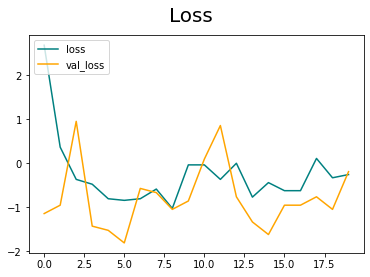

In [52]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

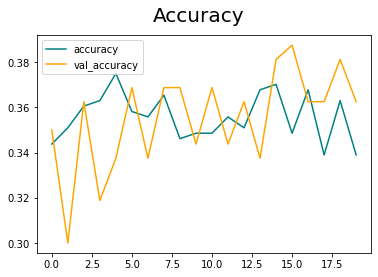

In [53]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluation of Model

In [54]:
from tensorflow.keras.metrics import Precision, Recall


In [55]:
pre = Precision()
re = Recall()

In [56]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)

1/1 [==============================] - 0s 471ms/step


In [57]:
print(pre.result(), re.result())

tf.Tensor(0.6455696, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


##### Precision = 64.56 and Recall = 100

## Saving the Model

In [125]:
from tensorflow.keras.models import load_model

In [126]:
model.save(os.path.join('models','ImageClassifier.h5'))